In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set_style('darkgrid')

In [4]:
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')

test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')


In [5]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')


In [6]:
print(train_identity.shape)
print(train_transaction.shape)
print(train.shape)

print(test_identity.shape)
print(test_transaction.shape)
print(test.shape)

(144233, 41)
(590540, 394)
(590540, 434)
(141907, 41)
(506691, 393)
(506691, 433)


**Exploratory Data Analysis**

In [7]:
print(train.describe())
print(test.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0    569877
1     20663
Name: isFraud, dtype: int64

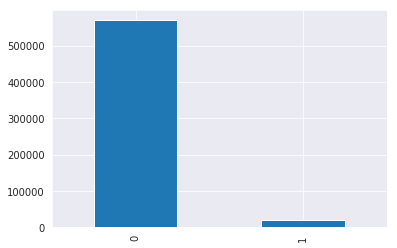

In [8]:
display(train.head())
display(test.head())
display(train['isFraud'].value_counts())
train['isFraud'].value_counts().plot.bar();

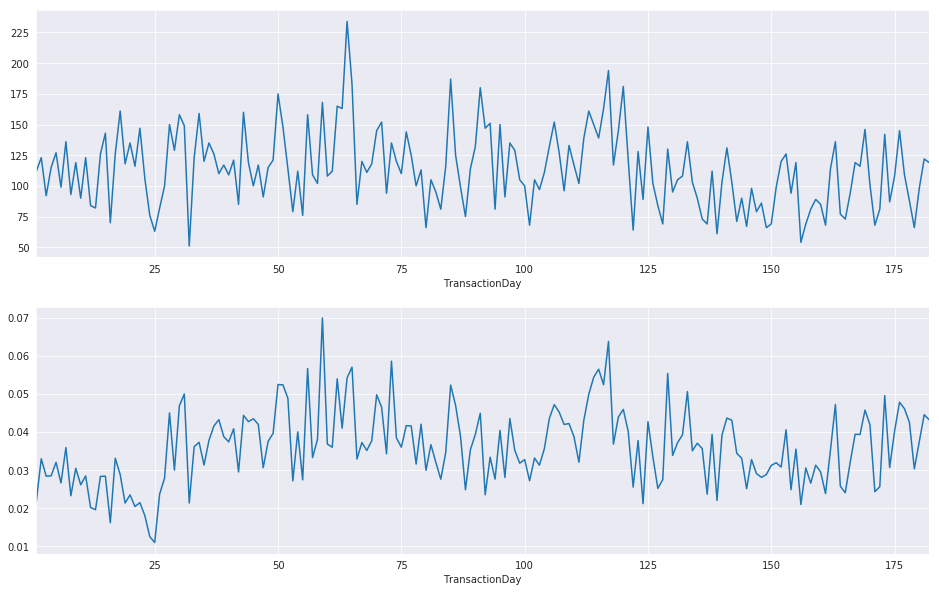

In [9]:
fig , ax = plt.subplots(2,1, figsize = (16,10))
train['TransactionDay'] = train['TransactionDT'] // (24*3600)
train.groupby('TransactionDay')['isFraud'].sum().plot.line(ax=ax[0])
train.groupby('TransactionDay')['isFraud'].mean().plot.line(ax=ax[1])

**Transforming Datatime (in milliseconds) to Date, Day, Month, Hour and Weekday** 

In [10]:
# Assuming Dec 2017 as the start date for the data
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')
train['Date'] = train['TransactionDT'].apply(lambda x: startdate+datetime.timedelta(seconds=x))
train['Month/Year'] = train['Date'].dt.month.astype(str)+'/'+train['Date'].dt.year.astype(str)
train['Weekday'] = train['Date'].dt.dayofweek
train['Hour'] = train['Date'].dt.hour
train['Day'] = train['Date'].dt.day

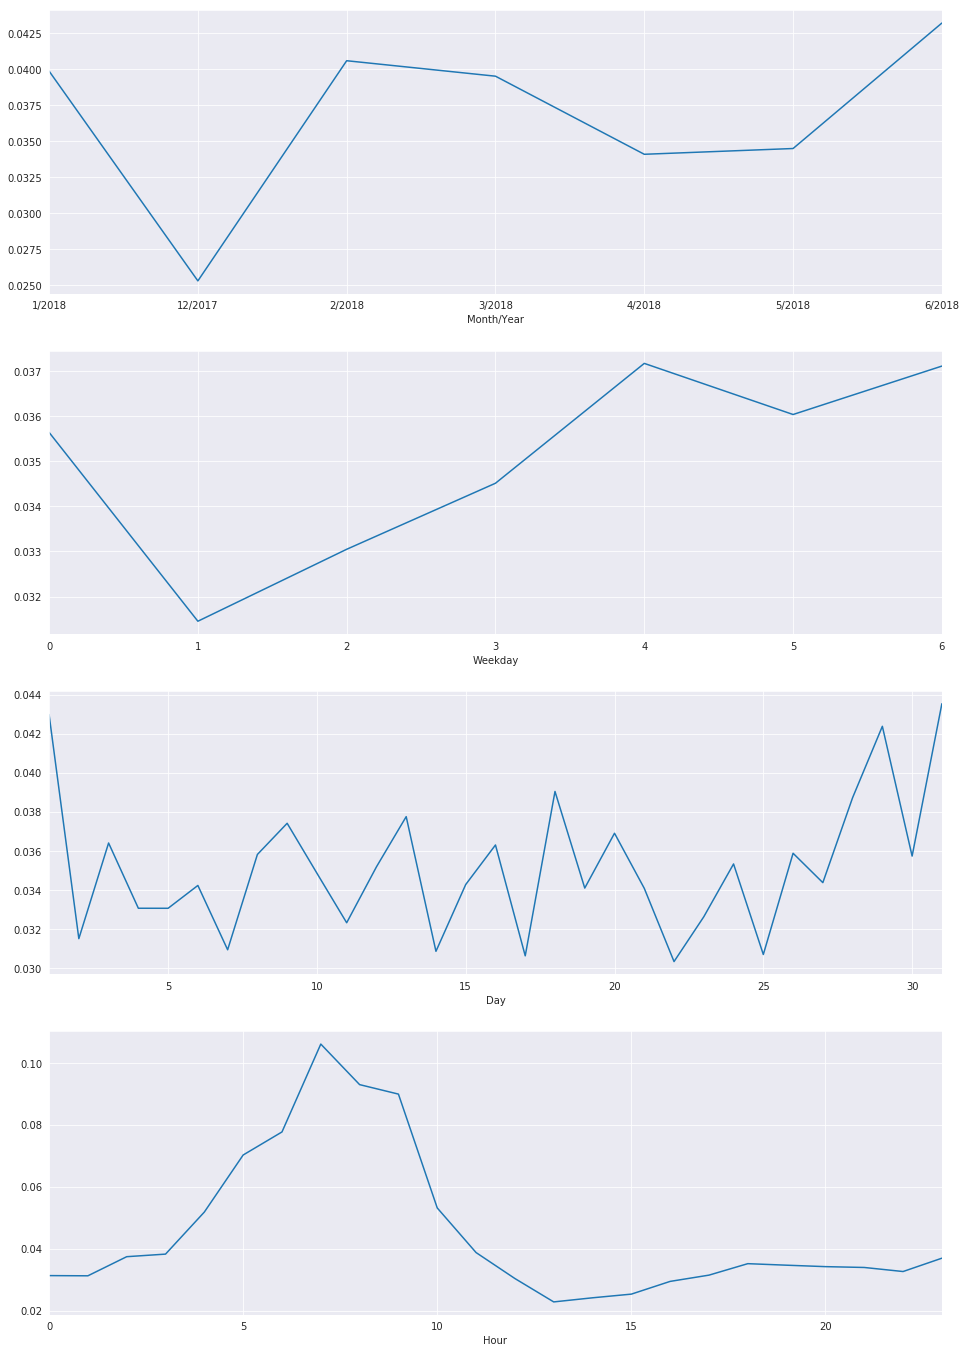

In [14]:
fig, ax = plt.subplots(4, 1, figsize = (16,24))
#train.groupby('Date')['isFraud'].mean().plot.line(ax = ax[0])
train.groupby('Month/Year')['isFraud'].mean().plot.line(ax = ax[0])
train.groupby('Weekday')['isFraud'].mean().plot.line(ax = ax[1])
train.groupby('Day')['isFraud'].mean().plot.line(ax = ax[2])
train.groupby('Hour')['isFraud'].mean().plot.line(ax = ax[3])